In [2]:
import pybamm as pb;import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;#import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
fs=17;
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)
import openpyxl
import traceback
import multiprocessing

In [11]:
import sys
#sys.path.insert(0, r'C:\Users\Niall\OneDrive - Imperial College London\Work\GitHub\Echem-analysis-functions\Data Analysis Functions')
sys.path.insert(0, r'D:\GitPyBaMM\LRH_409\LRH_409\envPBGEM\PyBaMM-GEM\wip\Niall_DMA\Data Analysis Functions')
str_1 = 'D:/GitPyBaMM/LRH_409/LRH_409/envPBGEM/PyBaMM-GEM/wip/Niall_DMA/'
PE_OCV_Niall = pd.read_csv(str_1+'Example Data/Reference half-cell data/LGM50_NMC_PE_lithiation_OCV_v2.csv', index_col=0).to_numpy()
NE_OCV_Niall = pd.read_csv(str_1+'Example Data/Reference half-cell data/LGM50_SiGr_NE_delithiation_OCV.csv', index_col=0).to_numpy()

In [9]:
str_2 = 'D:/GitPyBaMM/LRH_409/LRH_409/envPBGEM/PyBaMM-GEM/pybamm/input/parameters/lithium_ion/data/'
PE_OCV_Chen  = pd.read_csv(str_2+'nmc_LGM50_ocp_Chen2020.csv',header=None, comment='#').to_numpy()
NE_OCV_Chen  = pd.read_csv(str_2+'graphite_LGM50_ocp_Chen2020.csv',header=None, comment='#').to_numpy()


In [15]:
def nmc_LGM50_ocp_Chen2020(sto):
    u_eq = (
        -0.8090 * sto
        + 4.4875
        - 0.0428 * np.tanh(18.5138 * (sto - 0.5542))
        - 17.7326 * np.tanh(15.7890 * (sto - 0.3117))
        + 17.5842 * np.tanh(15.9308 * (sto - 0.3120))
    )
    return u_eq
def graphite_LGM50_ocp_OKane2023(sto):
    u_eq = (
        1.051 * np.exp(-26.76 * sto)
        + 0.1916
        - 0.05598 * np.tanh(35.62 * (sto - 0.1356))
        - 0.04483 * np.tanh(14.64 * (sto - 0.2861))
        - 0.02097 * np.tanh(26.28 * (sto - 0.6183))
        - 0.02398 * np.tanh(38.1 * (sto - 1))
    )

    return u_eq

In [18]:
soc = np.linspace(0,1,1000);
NE_OCV_fun_OKane2023 = graphite_LGM50_ocp_OKane2023(soc)
PE_OCV_fun_Chen2020  = nmc_LGM50_ocp_Chen2020(soc)

In [26]:
type(NE_OCV_Niall)

numpy.ndarray

Text(0.5, 1.0, 'Positive electrode')

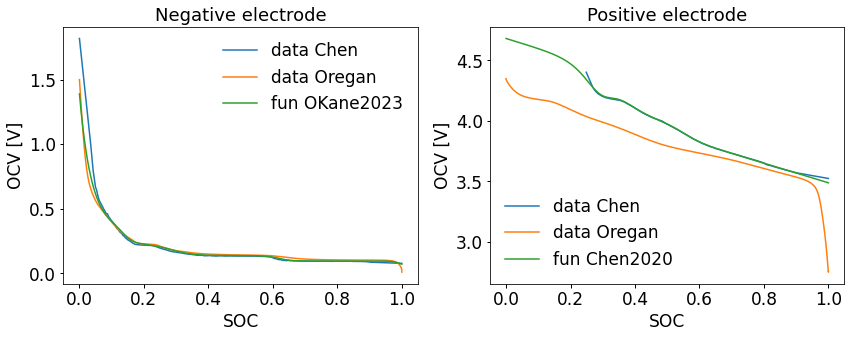

In [25]:
fig, axs = plt.subplots(1,2,figsize=(12,4.8),tight_layout=True)

axs[0].plot(NE_OCV_Chen[:,0],NE_OCV_Chen[:,1], label='data Chen')
axs[0].plot(NE_OCV_Niall[:,0],NE_OCV_Niall[:,1], label='data Oregan')
axs[0].plot(soc,NE_OCV_fun_OKane2023, label='fun OKane2023')
axs[1].plot(PE_OCV_Chen[:,0],PE_OCV_Chen[:,1], label='data Chen')
axs[1].plot(1-PE_OCV_Niall[:,0],PE_OCV_Niall[:,1], label='data Oregan')
axs[1].plot(soc,PE_OCV_fun_Chen2020, label='fun Chen2020')

for i in range(0,2):    
    axs[i].set_xlabel("SOC",   fontdict={'family':'DejaVu Sans','size':fs})
    axs[i].set_ylabel("OCV [V]",   fontdict={'family':'DejaVu Sans','size':fs})
    labels = axs[i].get_xticklabels() + axs[i].get_yticklabels(); [label.set_fontname('DejaVu Sans') for label in labels]
    axs[i].tick_params(labelcolor='k', labelsize=fs, width=1) ;  del labels;
    axs[i].legend(prop={'family':'DejaVu Sans','size':fs},loc='best',frameon=False)  

axs[0].set_title("Negative electrode", fontdict={'family':'DejaVu Sans','size':fs+1})
axs[1].set_title("Positive electrode", fontdict={'family':'DejaVu Sans','size':fs+1})


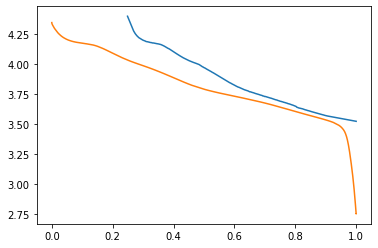

In [14]:
fig, ax = plt.subplots()
ax.plot(PE_OCV_Chen[:,0] ,PE_OCV_Chen[:,1])
ax.plot(1-PE_OCV_Niall[:,0],PE_OCV_Niall[:,1])